In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings("ignore")

In [63]:
sentiment_data = pd.read_csv('go_emotions_dataset.csv',index_col=0)
sentiment_data.head(5)

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
sentiment_data.tail(5)

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edrhoxh,The FDA has plenty to criticize. But like here...,False,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edze9g4,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211225 entries, eew5j0j to edze9g4
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   text                  211225 non-null  object
 1   example_very_unclear  211225 non-null  bool  
 2   admiration            211225 non-null  int64 
 3   amusement             211225 non-null  int64 
 4   anger                 211225 non-null  int64 
 5   annoyance             211225 non-null  int64 
 6   approval              211225 non-null  int64 
 7   caring                211225 non-null  int64 
 8   confusion             211225 non-null  int64 
 9   curiosity             211225 non-null  int64 
 10  desire                211225 non-null  int64 
 11  disappointment        211225 non-null  int64 
 12  disapproval           211225 non-null  int64 
 13  disgust               211225 non-null  int64 
 14  embarrassment         211225 non-null  int64 
 15  excitement     

In [66]:
sentiment_data.shape

(211225, 30)

In [67]:
# Checking for missing values
sentiment_data.isna().sum()

text                    0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [68]:
# Check for duplicates
duplicates = sentiment_data[sentiment_data.duplicated()]
duplicates_df = pd.DataFrame(duplicates, columns = sentiment_data.columns)
duplicates_df

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
efdj121,"[NAME] to [NAME]: ""Don't try and tell me how t...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edkg7kn,This is a slippery slippery slope that ends wi...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eesf28l,This is the most pleasant debate I’ve ever had...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
edsy2uo,Youtube is my Wikipedia. Videos about any inte...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
edirq0m,"Thanks, [NAME]",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [69]:
duplicates_df.head()


,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
efdj121,"[NAME] to [NAME]: ""Don't try and tell me how t...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edkg7kn,This is a slippery slippery slope that ends wi...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eesf28l,This is the most pleasant debate I’ve ever had...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
sentiment_data['text'].nunique()


57732

In [71]:
'''# Exploring patterns and trends in the dataset for the emotions columns
# Summary statistics
summary_stats = sentiment_data.describe()

# Correlation matrix
correlation_matrix = sentiment_data.corr()

# Print the results
print("Summary Statistics:")
print(summary_stats)'''

'# Exploring patterns and trends in the dataset for the emotions columns\n# Summary statistics\nsummary_stats = sentiment_data.describe()\n\n# Correlation matrix\ncorrelation_matrix = sentiment_data.corr()\n\n# Print the results\nprint("Summary Statistics:")\nprint(summary_stats)'

In [72]:
value_counts = sentiment_data['example_very_unclear'].value_counts()
value_counts

example_very_unclear
False    207814
True       3411
Name: count, dtype: int64

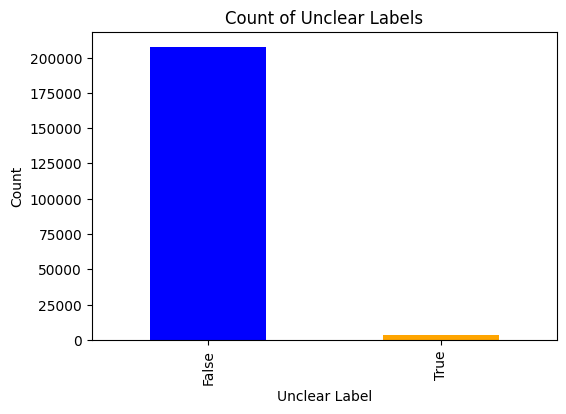

In [73]:
# Count the occurrences of each value in the example_very_unclear column
unclear_counts = sentiment_data['example_very_unclear'].value_counts()

# Plot the counts
unclear_counts.plot(kind='bar', figsize=(6, 4))
value_counts.plot.bar(color=['blue', 'orange'])
plt.xlabel('Unclear Label')
plt.ylabel('Count')
plt.title('Count of Unclear Labels')
plt.show()

In [74]:
# Confirming no emotions were recorded
filtered_data = sentiment_data[sentiment_data['example_very_unclear'] == True]
filtered_data.head(5)

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ee0ai3t,Oi us cancers don’t want him either! We respec...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ed0rtl7,I unfortunately can not afford a lawyer. Lucki...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eei8tja,OMG THOSE TINY SHOES! *desire to boop snoot in...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ee8zjas,I would pay money for [NAME] to not be my nurs...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#Filtering throught the dataset to have those with emotions alone
sentiments_df = sentiment_data[sentiment_data['example_very_unclear'] != True]

In [76]:
# creating a copy of the text column
# Rename the existing 'text' column to 'original_text'
sentiments_df.rename(columns={'text': 'original_text'}, inplace=True)

# Create a new column 'text' as a copy of 'original_text' and insert it next to 'original_text'
sentiments_df.insert(sentiments_df.columns.get_loc('original_text') + 1, 'text', sentiments_df['original_text'].copy())

In [77]:
sentiments_df.head()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ed2mah1,"You do right, if you don't care then fuck 'em!","You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eeibobj,Man I love reddit.,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...","[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eespn2i,Right? Considering it’s such an important docu...,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
sentiments_df.tail()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
ed89acy,"Well, I'm glad you're out of all that now. How...","Well, I'm glad you're out of all that now. How...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ee6pagw,Everyone likes [NAME].,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ef28nod,Well when you’ve imported about a gazillion of...,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ee8hse1,That looks amazing,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edrhoxh,The FDA has plenty to criticize. But like here...,The FDA has plenty to criticize. But like here...,False,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, eew5j0j to edrhoxh
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   original_text         207814 non-null  object
 1   text                  207814 non-null  object
 2   example_very_unclear  207814 non-null  bool  
 3   admiration            207814 non-null  int64 
 4   amusement             207814 non-null  int64 
 5   anger                 207814 non-null  int64 
 6   annoyance             207814 non-null  int64 
 7   approval              207814 non-null  int64 
 8   caring                207814 non-null  int64 
 9   confusion             207814 non-null  int64 
 10  curiosity             207814 non-null  int64 
 11  desire                207814 non-null  int64 
 12  disappointment        207814 non-null  int64 
 13  disapproval           207814 non-null  int64 
 14  disgust               207814 non-null  int64 
 15  embarrassment  

In [80]:
sentiments_df.shape

(207814, 31)

In [81]:
sentiments_df.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,...,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000
mean,0.082434,0.044487,0.038900,0.065530,0.084787,0.028867,0.035411,0.046638,0.018367,0.040753,...,0.039415,0.008710,0.041937,0.006265,0.042273,0.006203,0.012150,0.032519,0.026533,0.266094
std,0.275026,0.206175,0.193358,0.247459,0.278566,0.167434,0.184818,0.210862,0.134276,0.197717,...,0.194581,0.092919,0.200445,0.078905,0.201213,0.078513,0.109557,0.177376,0.160715,0.441915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:

sentiments_df.isna().sum()

original_text           0
text                    0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [83]:
sentiments_df.duplicated().sum()


56410

In [84]:
duplicate_rows = sentiments_df[sentiments_df.duplicated()]
duplicate_rows.head(5)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
efdj121,"[NAME] to [NAME]: ""Don't try and tell me how t...","[NAME] to [NAME]: ""Don't try and tell me how t...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...","""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edkg7kn,This is a slippery slippery slope that ends wi...,This is a slippery slippery slope that ends wi...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
eesf28l,This is the most pleasant debate I’ve ever had...,This is the most pleasant debate I’ve ever had...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ed2mah1,"You do right, if you don't care then fuck 'em!","You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
#Grouping the emotions into a set
emotions = set(sentiments_df.columns[2:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'example_very_unclear',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [86]:
def assign_emotions(row):
    emotion_list = [emotion for emotion, value in row.items() if value == 1]
    return ', '.join(emotion_list)


# Create a new column 'listed_emotions' to store the individual emotions per row
sentiments_df['listed_emotions'] = sentiments_df.apply(assign_emotions, axis=1)

# Print the updated DataFrame
print(sentiments_df.head())

                                             original_text  \
id                                                           
eew5j0j                                    That game hurt.   
ed2mah1     You do right, if you don't care then fuck 'em!   
eeibobj                                 Man I love reddit.   
eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
eespn2i  Right? Considering it’s such an important docu...   

                                                      text  \
id                                                           
eew5j0j                                    That game hurt.   
ed2mah1     You do right, if you don't care then fuck 'em!   
eeibobj                                 Man I love reddit.   
eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
eespn2i  Right? Considering it’s such an important docu...   

         example_very_unclear  admiration  amusement  anger  annoyance  \
id                                                      

In [87]:
specific_id = 'eew5j0j'

# Using loc to access the record with the specific ID
specific_record = sentiments_df.loc[specific_id]

# Printing the specific record
print(specific_record)

           original_text             text  example_very_unclear  admiration  \
id                                                                            
eew5j0j  That game hurt.  That game hurt.                 False           0   
eew5j0j  That game hurt.  That game hurt.                 False           0   
eew5j0j  That game hurt.  That game hurt.                 False           0   
eew5j0j  That game hurt.  That game hurt.                 False           0   
eew5j0j  That game hurt.  That game hurt.                 False           0   

         amusement  anger  annoyance  approval  caring  confusion  ...  \
id                                                                 ...   
eew5j0j          0      0          0         0       0          0  ...   
eew5j0j          0      0          0         0       0          0  ...   
eew5j0j          0      0          0         0       0          0  ...   
eew5j0j          0      0          0         0       0          0  ...   
ee

In [88]:
# Creating column that counts how many emotions are listed in a row
sentiments_df['emotion_count'] = sentiments_df['listed_emotions'].str.split(', ').apply(lambda x: len(x))

# Print the updated DataFrame
print(sentiments_df.head(20))

                                             original_text  \
id                                                           
eew5j0j                                    That game hurt.   
ed2mah1     You do right, if you don't care then fuck 'em!   
eeibobj                                 Man I love reddit.   
eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
eespn2i  Right? Considering it’s such an important docu...   
eczuekb  He isn't as big, but he's still quite popular....   
ed5tx8y  That's crazy; I went to a super [RELIGION] hig...   
ef961hv                                that's adorable asf   
edl7cr3  "Sponge Blurb Pubs Quaw Haha GURR ha AAa!" fin...   
ed9w1hm  I have, and now that you mention it, I think t...   
ee52cjs  I wanted to downvote this, but it's not your f...   
ef7tl7i                              BUT IT'S HER TURN! /s   
ee9vw9t                                       That is odd.   
edsqvyx                                  Build a wall? /jk   
ed13jls 

In [89]:
#sentiments_df['text'] = sentiments_df['text'].str.lower()
sentiments_df = sentiments_df.copy()
sentiments_df['text'] = sentiments_df['text'].str.lower()

In [90]:
sentiments_df.head(3)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,1
ed2mah1,"You do right, if you don't care then fuck 'em!","you do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eeibobj,Man I love reddit.,man i love reddit.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,1


In [91]:
import string
import re
def pre_process(text):
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"/\[\]]+')#checking the character is not listed within the bracket


  # Convert to lowercase
  text = text.lower()

  # Remove links
  text = re.sub('http://\S+|https://\S+', '', text)
  text = re.sub('http[s]?://\S+', '', text)
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"http\S+", "", text)


  # Convert HTML references
  text = re.sub('&amp', 'and', text)
  text = re.sub('&lt', '<', text)
  text = re.sub('&gt', '>', text)
  text = re.sub(r'\xa0', ' ', text)

    # Removing numbers
  text = re.sub(r'\d+', '', text)


  # Remove new line characters
  text = re.sub('[\r\n]+', ' ', text)
  text = re.sub(re_char, "", text) # Remove unknown character

  # Remove mentions
  text = re.sub(r'@\w+', '', text)

  # Remove hashtags
  text = re.sub(r'#\w+', '', text)


  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text = text.translate(punc)

  # Remove the word "name"
  text = re.sub(r'\bname\b', '', text)


  return text

In [92]:
sentiments_df.loc[:, 'text'] = sentiments_df['text'].apply(lambda text: pre_process(text))


In [93]:
sentiments_df.head(5)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,1
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,1
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eespn2i,Right? Considering it’s such an important docu...,right considering its such an important docum...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,gratitude,1


In [94]:
#Removing more punctuations within the text
def remove_punctuation(text):
    text = re.sub(r"['']", '', text)
    return text

In [95]:
# Apply remove_punctuation function to 'lemmatized_text' column
sentiments_df['text'] = sentiments_df['text'].apply(remove_punctuation)

In [96]:
import emoji
import demoji


In [97]:
'''# Download the emoji dictionary
demoji.download_codes()

# Function to extract emojis from text
def extract_emojis(text):
    emojis = demoji.findall(text)
    return ''.join(emojis.keys())

# # Creating an emoji column to hold emojis from the text
sentiments_df['emojis'] = sentiments_df['text'].apply(extract_emojis)'''

"# Download the emoji dictionary\ndemoji.download_codes()\n\n# Function to extract emojis from text\ndef extract_emojis(text):\n    emojis = demoji.findall(text)\n    return ''.join(emojis.keys())\n\n# # Creating an emoji column to hold emojis from the text\nsentiments_df['emojis'] = sentiments_df['text'].apply(extract_emojis)"

In [98]:
'''# Retrieving a specific record with emojis
specific_id = 'ee0sak1'

# Using loc to access the record with the specific ID
specific_record = sentiments_df.loc[specific_id]

# Printing the specific record
print(specific_record)'''

"# Retrieving a specific record with emojis\nspecific_id = 'ee0sak1'\n\n# Using loc to access the record with the specific ID\nspecific_record = sentiments_df.loc[specific_id]\n\n# Printing the specific record\nprint(specific_record)"

In [99]:
'''# #Retrieving records with emojis
demoji.download_codes()  

def has_emoji(text):
    emojis = demoji.findall(text)
    return bool(emojis)

emoji_records = sentiments_df[sentiments_df['emojis'].apply(has_emoji)]

# Printing the records with emojis
print(emoji_records)'''

"# #Retrieving records with emojis\ndemoji.download_codes()  \n\ndef has_emoji(text):\n    emojis = demoji.findall(text)\n    return bool(emojis)\n\nemoji_records = sentiments_df[sentiments_df['emojis'].apply(has_emoji)]\n\n# Printing the records with emojis\nprint(emoji_records)"

In [100]:
#type(emoji_records)


In [101]:
#emoji_records.info()


In [102]:
'''import plotly.graph_objects as go
# Download the emoji dictionary
demoji.download_codes()

# Count the occurrence of each emoji in the 'emojis' column
emoji_counts = sentiments_df['emojis'].apply(lambda x: demoji.findall(x)).explode().value_counts()

# Select the top 10 most used emojis
top_10_emojis = emoji_counts.head(10)

# Create a bar plot using Plotly
fig = go.Figure(go.Bar(
    x=top_10_emojis.index,  # Emojis as x-axis values
    y=top_10_emojis.values,  # Count as y-axis values
    marker=dict(color='rgba(0, 128, 0, 1)'),  # Set the color to a bright green with reduced opacity
    width=0.5  # Adjust the bar width (smaller value makes the bars thinner)
))

# Set plot layout and titles
fig.update_layout(
    title='Top 10 Most Used Emojis',
    title_x=0.5,  # Center the title
    xaxis_title='Emoji',
    yaxis_title='Count',
    xaxis_tickangle=45,
    height=500,
    xaxis=dict(showgrid=True),  # Remove x-axis gridlines
    yaxis=dict(showgrid=True),  # Remove y-axis gridlines
    plot_bgcolor='lightgray',  # Set the background color to white
    font=dict(
        family="Arial",  # Font family
        size=14,  # Font size
        color="white",  # Font color
    )
)
fig.show()'''

'import plotly.graph_objects as go\n# Download the emoji dictionary\ndemoji.download_codes()\n\n# Count the occurrence of each emoji in the \'emojis\' column\nemoji_counts = sentiments_df[\'emojis\'].apply(lambda x: demoji.findall(x)).explode().value_counts()\n\n# Select the top 10 most used emojis\ntop_10_emojis = emoji_counts.head(10)\n\n# Create a bar plot using Plotly\nfig = go.Figure(go.Bar(\n    x=top_10_emojis.index,  # Emojis as x-axis values\n    y=top_10_emojis.values,  # Count as y-axis values\n    marker=dict(color=\'rgba(0, 128, 0, 1)\'),  # Set the color to a bright green with reduced opacity\n    width=0.5  # Adjust the bar width (smaller value makes the bars thinner)\n))\n\n# Set plot layout and titles\nfig.update_layout(\n    title=\'Top 10 Most Used Emojis\',\n    title_x=0.5,  # Center the title\n    xaxis_title=\'Emoji\',\n    yaxis_title=\'Count\',\n    xaxis_tickangle=45,\n    height=500,\n    xaxis=dict(showgrid=True),  # Remove x-axis gridlines\n    yaxis=dict(s

In [103]:
# Function to remove emoji from the text column
def remove_emoji(text):
    no_emoji = re.sub(r':[^\s:]+:', '', text)
    return no_emoji

# Apply the remove_emoji function to the 'text' column
sentiments_df['text'] = sentiments_df['text'].apply(remove_emoji)

In [104]:
# Display the updated DataFrame
sentiments_df.head(5)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,1
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,1
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eespn2i,Right? Considering it’s such an important docu...,right considering its such an important docum...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,gratitude,1


In [105]:
# Retrieve the text using the index
text_ = sentiments_df.loc['ee0sak1', 'text']

# Display the text
print(text_)

id
ee0sak1    what a great photo and you two look so happy  
ee0sak1    what a great photo and you two look so happy  
ee0sak1    what a great photo and you two look so happy  
Name: text, dtype: object


In [106]:
sentiments_df.head()


,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,1
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,1
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eespn2i,Right? Considering it’s such an important docu...,right considering its such an important docum...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,gratitude,1


In [107]:
# saving the sentiments_df to a csv
sentiments_df.to_csv('sentiments_df_1.csv', index = True)

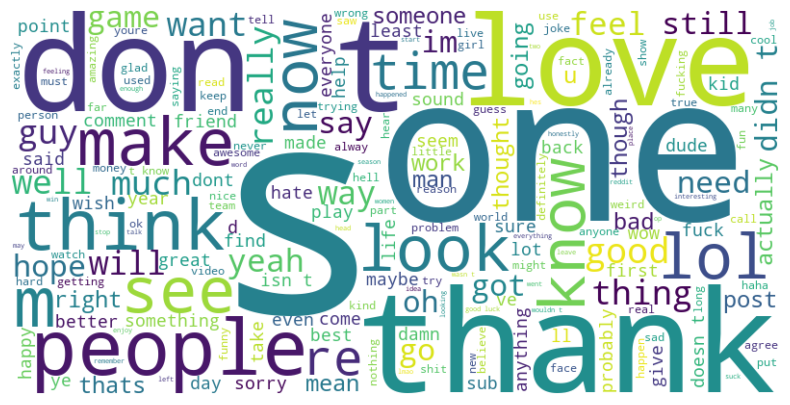

In [108]:
from wordcloud import WordCloud

# Concatenate all the text data into a single string
text = ' '.join(sentiments_df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [109]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the 'text' column
sentiments_df['text'] = sentiments_df['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pbans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [111]:
# Print the tokenized text
sentiments_df.head()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,"[that, game, hurt]",False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,1
ed2mah1,"You do right, if you don't care then fuck 'em!","[you, do, right, if, you, don, t, care, then, ...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eeibobj,Man I love reddit.,"[man, i, love, reddit]",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,1
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...","[was, nowhere, near, them, he, was, by, the, f...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,1
eespn2i,Right? Considering it’s such an important docu...,"[right, considering, its, such, an, important,...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,gratitude,1


In [112]:
#Visualizing the most common words using matplotlib

def most_frequent_words(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

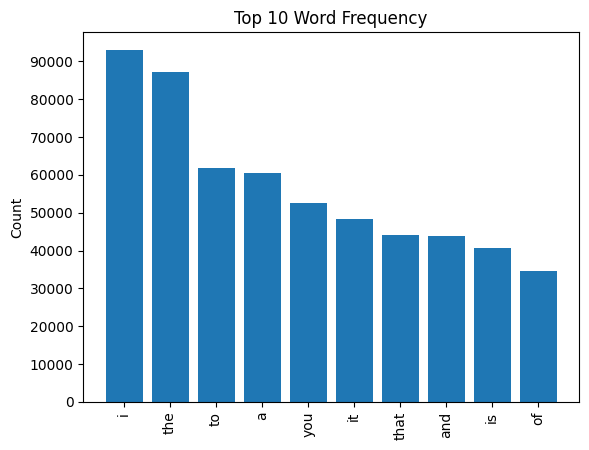

In [113]:
#Visualising the entire dataset

sample_freq_dist = FreqDist(sentiments_df['text'].explode())
most_frequent_words(sample_freq_dist, "Top 10 Word Frequency")

In [116]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Get the set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the text column
sentiments_df['text'] = sentiments_df['text'].apply(lambda x: ' '.join([word for word in ' '.join(x).split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
# Print the text without stop words
sentiments_df.head()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,game hurt,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,sadness,1,game hurt
ed2mah1,"You do right, if you don't care then fuck 'em!",right care fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,right care fuck em
eeibobj,Man I love reddit.,man love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,love,1,man love reddit
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",nowhere near falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,nowhere near falcon
eespn2i,Right? Considering it’s such an important docu...,right considering important document know damn...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,gratitude,1,right considering important document know damn...


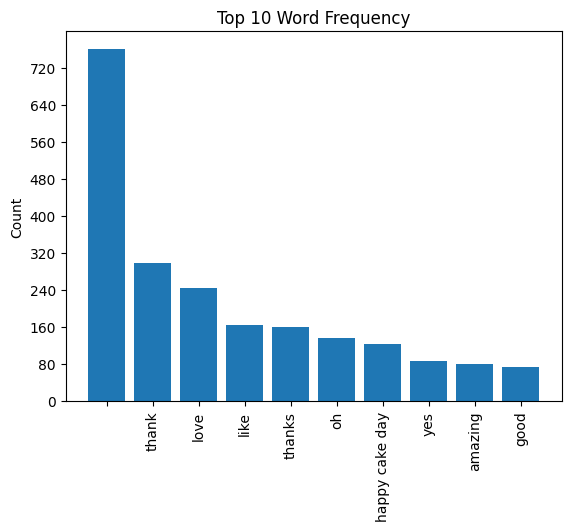

In [118]:
#Visualising the entire dataset after removal of stop words
sample_freq_dist = FreqDist(sentiments_df['text'].explode())
most_frequent_words(sample_freq_dist, "Top 10 Word Frequency")

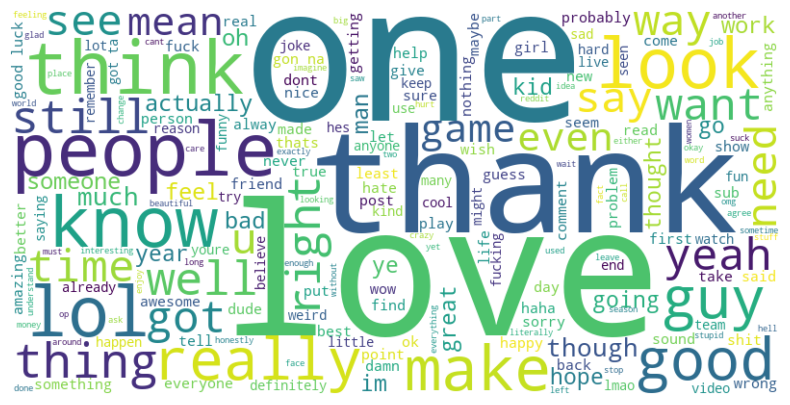

In [119]:
from wordcloud import WordCloud

# Concatenate all the text data into a single string
text = ' '.join(sentiments_df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
# Re-Tokenize the 'text' column
sentiments_df['text'] = sentiments_df['text'].apply(word_tokenize)

In [121]:
sentiments_df.head()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,"[game, hurt]",False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,sadness,1,game hurt
ed2mah1,"You do right, if you don't care then fuck 'em!","[right, care, fuck, em]",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,right care fuck em
eeibobj,Man I love reddit.,"[man, love, reddit]",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,love,1,man love reddit
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...","[nowhere, near, falcon]",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,nowhere near falcon
eespn2i,Right? Considering it’s such an important docu...,"[right, considering, important, document, know...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,gratitude,1,right considering important document know damn...


## Lemetization

In [122]:
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pbans\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pbans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

In [124]:
# Lemmatize the tokenized text column
sentiments_df['text'] = sentiments_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [125]:
# Print the lemmatized text
sentiments_df.head()

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,game hurt,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,sadness,1,game hurt
ed2mah1,"You do right, if you don't care then fuck 'em!",right care fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,right care fuck em
eeibobj,Man I love reddit.,man love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,love,1,man love reddit
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",nowhere near falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,nowhere near falcon
eespn2i,Right? Considering it’s such an important docu...,right considering important document know damn...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,gratitude,1,right considering important document know damn...


## Emotions Categorization


In [126]:
# Creating a column for the labels
# Define the mapping of emotions to categories
emotion_to_category = {
    'admiration': 'positive',
    'amusement': 'positive',
    'approval': 'positive',
    'caring': 'positive',
    'curiosity': 'positive',
    'excitement': 'positive',
    'gratitude': 'positive',
    'joy': 'positive',
    'love': 'positive',
    'optimism': 'positive',
    'relief': 'positive',
    'surprise': 'positive',
    'sadness': 'negative',
    'pride': 'negative',
    'fear': 'negative',
    'embarrassment': 'negative',
    'disapproval': 'negative',
    'disappointment': 'negative',
    'confusion': 'negative',
    'annoyance': 'negative',
    'anger': 'negative',
    'nervousness': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'realization': 'positive',
    'grief': 'negative',
    'disgust': 'negative',
    'neutral': 'neutral'
}


emotions_columns = sentiments_df.columns[3:-3]

In [127]:
emotions_columns


Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [128]:
# Creating a labels column that hold the categoties of the emotions
sentiments_df['labels'] = sentiments_df[emotions_columns].apply(lambda row: emotion_to_category.get(row.idxmax(), 'unknown'), axis=1)

In [129]:
sentiments_df.head()


,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment,labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,game hurt,False,0,0,0,0,0,0,0,...,0,0,0,1,0,0,sadness,1,game hurt,negative
ed2mah1,"You do right, if you don't care then fuck 'em!",right care fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,neutral,1,right care fuck em,neutral
eeibobj,Man I love reddit.,man love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,love,1,man love reddit,positive
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",nowhere near falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,neutral,1,nowhere near falcon,neutral
eespn2i,Right? Considering it’s such an important docu...,right considering important document know damn...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,gratitude,1,right considering important document know damn...,positive


In [130]:
# Encoding the labels column
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
sentiments_df['encoded_labels'] = label_encoder.fit_transform(sentiments_df['labels'])

In [131]:
sentiments_df.head(10)


,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment,labels,encoded_labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,game hurt,False,0,0,0,0,0,0,0,...,0,0,1,0,0,sadness,1,game hurt,negative,0
ed2mah1,"You do right, if you don't care then fuck 'em!",right care fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,right care fuck em,neutral,1
eeibobj,Man I love reddit.,man love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,love,1,man love reddit,positive,2
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",nowhere near falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,nowhere near falcon,neutral,1
eespn2i,Right? Considering it’s such an important docu...,right considering important document know damn...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,gratitude,1,right considering important document know damn...,positive,2
eczuekb,"He isn't as big, but he's still quite popular....",big still quite popular heard thing content ne...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,disapproval,1,big still quite popular heard thing content ne...,negative,0
ed5tx8y,That's crazy; I went to a super [RELIGION] hig...,crazy went super religion high school think re...,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,crazy went super religion high school think re...,positive,2
ef961hv,that's adorable asf,adorable asf,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,adorable asf,positive,2
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",sponge blurb pub quaw haha gurr ha aaa finale ...,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,sponge blurb pubs quaw haha gurr ha aaa finale...,positive,2


In [132]:
unique_values = sentiments_df[['encoded_labels', 'labels']].drop_duplicates().values


In [133]:
for value in unique_values:
    encoded_label, label = value
    print(f"Encoded Label: {encoded_label}, Label: {label}")

Encoded Label: 0, Label: negative
Encoded Label: 1, Label: neutral
Encoded Label: 2, Label: positive


In [134]:
print(sentiments_df['labels'].value_counts())


labels
positive    92024
negative    60492
neutral     55298
Name: count, dtype: int64


In [135]:
sentiments_df.head(30)


,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,sentiment,labels,encoded_labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,game hurt,False,0,0,0,0,0,0,0,...,0,0,1,0,0,sadness,1,game hurt,negative,0
ed2mah1,"You do right, if you don't care then fuck 'em!",right care fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,right care fuck em,neutral,1
eeibobj,Man I love reddit.,man love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,love,1,man love reddit,positive,2
eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",nowhere near falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,nowhere near falcon,neutral,1
eespn2i,Right? Considering it’s such an important docu...,right considering important document know damn...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,gratitude,1,right considering important document know damn...,positive,2
eczuekb,"He isn't as big, but he's still quite popular....",big still quite popular heard thing content ne...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,disapproval,1,big still quite popular heard thing content ne...,negative,0
ed5tx8y,That's crazy; I went to a super [RELIGION] hig...,crazy went super religion high school think re...,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,crazy went super religion high school think re...,positive,2
ef961hv,that's adorable asf,adorable asf,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,adorable asf,positive,2
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",sponge blurb pub quaw haha gurr ha aaa finale ...,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,sponge blurb pubs quaw haha gurr ha aaa finale...,positive,2


## Data Exploration


## Categorizing Emotions


In [136]:
sentiments_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, eew5j0j to edrhoxh
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   original_text         207814 non-null  object
 1   text                  207814 non-null  object
 2   example_very_unclear  207814 non-null  bool  
 3   admiration            207814 non-null  int64 
 4   amusement             207814 non-null  int64 
 5   anger                 207814 non-null  int64 
 6   annoyance             207814 non-null  int64 
 7   approval              207814 non-null  int64 
 8   caring                207814 non-null  int64 
 9   confusion             207814 non-null  int64 
 10  curiosity             207814 non-null  int64 
 11  desire                207814 non-null  int64 
 12  disappointment        207814 non-null  int64 
 13  disapproval           207814 non-null  int64 
 14  disgust               207814 non-null  int64 
 15  embarrassment  

In [137]:
#Grouping the emotions into a set
emotions = set(sentiments_df.columns[3:-5])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [138]:
positive_col = ['admiration','amusement','approval','realization','caring','curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','disgust','grief','embarrassment','disapproval','remorse','disappointment','confusion','annoyance','anger','nervousness','desire']
neutral_col = ['neutral']

In [139]:
positive_col = sentiments_df[positive_col]
negative_col = sentiments_df[negative_col]
neutral_col = sentiments_df[neutral_col]

In [140]:
df_emotion = pd.DataFrame()
df_emotion['emotion'] = list(emotions)
df_emotion['group'] = ''
df_emotion['group'].loc[df_emotion['emotion'].isin(positive_col)] = 'positive'
df_emotion['group'].loc[df_emotion['emotion'].isin(negative_col)] = 'negative'
df_emotion['group'].loc[df_emotion['emotion'].isin(neutral_col)] = 'neutral'
df_emotion.head(3)

,emotion,group
0,desire,negative
1,optimism,positive
2,disappointment,negative


In [141]:
df_emotion['group'].unique()


array(['negative', 'positive', 'neutral'], dtype=object)

In [142]:
df_emotion.columns


Index(['emotion', 'group'], dtype='object')

In [143]:
# Calculate the sum of each emotion's count
temp = sentiments_df[emotions].sum(axis=0) \
    .reset_index() \
    .rename(columns={'index': 'emotion', 0: 'count'}) \
    .merge(df_emotion, how='left', on='emotion') \
    .sort_values('count', ascending=False)

# Define colors for different emotion groups
palette = {
    "positive": "skyblue",
    "negative": "red",
    "neutral": "green"
}

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)

sns.barplot(data=temp, x='count', y='emotion', hue='group',
            dodge=False, palette=palette, ax=ax)

ax.set_title('Count of emotions appearance')
plt.show()

TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [144]:
temp = temp.groupby('group').agg('sum').reset_index()
temp = temp.sort_values('count', ascending=False)

ax = sns.barplot(data=temp, x='group', y='count')
ax.set_title('Emotions category counts')
plt.show()

NameError: name 'temp' is not defined

In [145]:
emotion_counts = {}
for c in positive_col:
    emotion_counts[c]  = positive_col[c].value_counts().to_dict()[1]

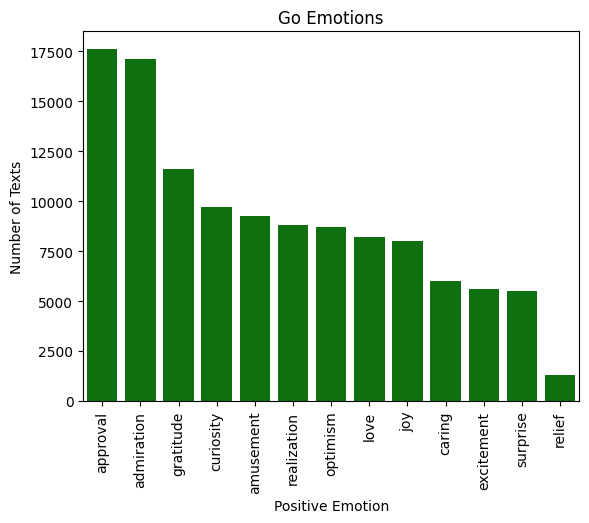

In [146]:
# Sort the emotion counts dictionary by values in descending order
emotion_counts_sorted = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)

# Extract emotions and counts as separate lists from the sorted dictionary
emotions = [item[0] for item in emotion_counts_sorted]
counts = [item[1] for item in emotion_counts_sorted]

# Create the bar plot using Seaborn
sns.barplot(x=emotions, y=counts, color='green')

# Set plot labels and title
plt.title('Go Emotions')
plt.xlabel("Positive Emotion")
plt.ylabel("Number of Texts")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [147]:
emotion_counts = {}
for c in negative_col:
    emotion_counts[c]  = negative_col[c].value_counts().to_dict()[1]

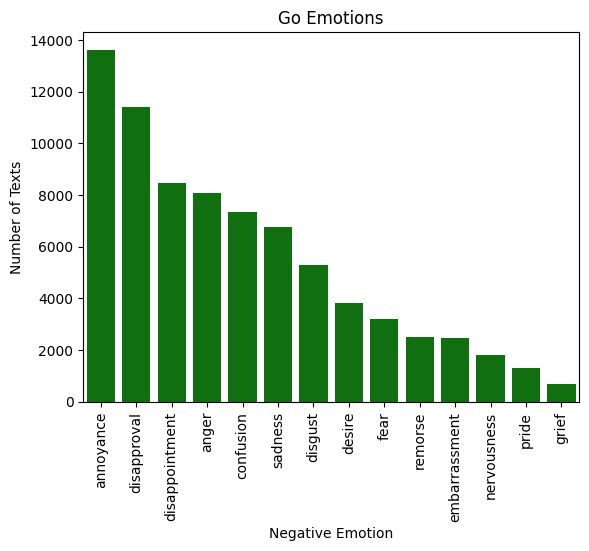

In [148]:
# Sort the emotion counts dictionary by values in descending order
emotion_counts_sorted = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)

# Extract emotions and counts as separate lists from the sorted dictionary
emotions = [item[0] for item in emotion_counts_sorted]
counts = [item[1] for item in emotion_counts_sorted]

# Create the bar plot using Seaborn with green color
sns.barplot(x=emotions, y=counts, color='green')

# Set plot labels and title
plt.title('Go Emotions')
plt.xlabel("Negative Emotion")
plt.ylabel("Number of Texts")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [149]:
neutral_counts = neutral_col.value_counts()
neutral_counts

neutral
0          152516
1           55298
Name: count, dtype: int64

In [150]:
sentiments_df.columns

Index(['original_text', 'text', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral', 'listed_emotions',
       'emotion_count', 'sentiment', 'labels', 'encoded_labels'],
      dtype='object')

In [151]:
sentiments_df = sentiments_df[['original_text', 'text', 'listed_emotions','emotion_count','labels','encoded_labels']]
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, eew5j0j to edrhoxh
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   original_text    207814 non-null  object
 1   text             207814 non-null  object
 2   listed_emotions  207814 non-null  object
 3   emotion_count    207814 non-null  int64 
 4   labels           207814 non-null  object
 5   encoded_labels   207814 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 18.4+ MB


In [152]:
# Filter the DataFrame to select rows where 'text' is not equal to 0
filtered_df = sentiments_df[sentiments_df['text'] != 0]

# Group by 'text', create lists of 'listed_emotions' and 'labels', and store them in 'emotions' and 'labels' columns
grouped_sentiments = filtered_df.groupby('text').apply(lambda x: pd.Series({
    #'emotions_': x['listed_emotions'].tolist(),
    #'labels': x['labels'].tolist()
})).reset_index()

# Explode the lists in 'emotions' and 'labels' columns to separate rows
grouped_sentiments = grouped_sentiments.explode('text')

# Print the resulting DataFrame
print(grouped_sentiments.head(20))

                                                 text
0                                                    
1                         aa b whole meritocracy gtfo
2                           aaaaaaaaaaaaaahhh imagine
3                                aaaaaaaaaaaaand boop
4                            aaaaaand feeling morning
5                           aaaaaand soccer hopefully
6            aaaaaand turned terrible road everywhere
7   aaaaand already bol going wait see come back i...
8              aaaaand concerned clearly story behind
9                                        aaaaand sold
10                aaaand couldnt online dating single
11         aaaand everybody got diarrhea thanks dummy
12             aaaand intercepted goal line music ear
13  aaaand still alt account whoever reported sure...
14                                   aaaand yard sale
15                      aaaay unite magical sky fairy
16                    aaahahahha jabba hut role model
17                          

In [153]:
# Handling missing values in the 'text' column
#pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
grouped_sentiments = grouped_sentiments[grouped_sentiments['text'] != '']
grouped_sentiments.head(20)
# Reset the index of the DataFrame
#grouped_sentiments.reset_index(drop=True, inplace=True)

,text
1,aa b whole meritocracy gtfo
2,aaaaaaaaaaaaaahhh imagine
3,aaaaaaaaaaaaand boop
4,aaaaaand feeling morning
5,aaaaaand soccer hopefully
6,aaaaaand turned terrible road everywhere
7,aaaaand already bol going wait see come back i...
8,aaaaand concerned clearly story behind
9,aaaaand sold
10,aaaand couldnt online dating single


In [154]:
duplicates = grouped_sentiments['text'].duplicated().sum()
duplicates

0

In [155]:
grouped_sentiments.shape

(55876, 1)

In [156]:
# Drop duplicates based on specific columns
no_duplicates = grouped_sentiments.drop_duplicates()
no_duplicates.shape

(55876, 1)

In [157]:

# Perform a left join to keep only the rows from 'no_duplicates' in the final DataFrame
final_df = no_duplicates.merge(sentiments_df, on=['text'], suffixes = ('_no_duplicates','_sentiments_df'))

# Print the resulting DataFrame
print(final_df)

                                                     text  \
0                             aa b whole meritocracy gtfo   
1                             aa b whole meritocracy gtfo   
2                             aa b whole meritocracy gtfo   
3                               aaaaaaaaaaaaaahhh imagine   
4                               aaaaaaaaaaaaaahhh imagine   
...                                                   ...   
207049             zoomed skeptical af could painting wow   
207050             zoomed skeptical af could painting wow   
207051  zucchini literally lol trying wake sleeping hu...   
207052  zucchini literally lol trying wake sleeping hu...   
207053  zucchini literally lol trying wake sleeping hu...   

                                            original_text  \
0               AA is BS as a whole. Meritocracy or GTFO.   
1               AA is BS as a whole. Meritocracy or GTFO.   
2               AA is BS as a whole. Meritocracy or GTFO.   
3                     "

In [158]:
final_df.shape


(207054, 6)

In [159]:
# Data with duplicates
#Deduping based on text column
sentiments_df = final_df.drop_duplicates(subset='text')
print("Deduplicated DataFrame based on 'Text':")
print(sentiments_df)
print()

Deduplicated DataFrame based on 'Text':
                                                     text  \
0                             aa b whole meritocracy gtfo   
3                               aaaaaaaaaaaaaahhh imagine   
8                                    aaaaaaaaaaaaand boop   
11                               aaaaaand feeling morning   
14                              aaaaaand soccer hopefully   
...                                                   ...   
207039  zoo reason many endangered specie longer endan...   
207042                       zoo reason tiggers goddamnit   
207045                    zoom bit tell literally painted   
207048             zoomed skeptical af could painting wow   
207051  zucchini literally lol trying wake sleeping hu...   

                                            original_text listed_emotions  \
0               AA is BS as a whole. Meritocracy or GTFO.         neutral   
3                     "AaaaaAAAaaaAAAhhh!" I can imagine.         neutral

In [160]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55876 entries, 0 to 207051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             55876 non-null  object
 1   original_text    55876 non-null  object
 2   listed_emotions  55876 non-null  object
 3   emotion_count    55876 non-null  int64 
 4   labels           55876 non-null  object
 5   encoded_labels   55876 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 2.8+ MB


## Converting notebook to csv for modelling phase


In [161]:
# saving the sentiments_df to a csv
sentiments_df.to_csv('Preprocessed_data_1.csv', index = True)

### Categorization of the Emotions

In [292]:
# Creating a column for the labels
# Define the mapping of emotions to categories
emotion_to_category = {
    'admiration': 'positive',
    'amusement': 'positive',
    'approval': 'positive',
    'caring': 'positive',
    'curiosity': 'positive',
    'excitement': 'positive',
    'gratitude': 'positive',
    'joy': 'positive',
    'love': 'positive',
    'optimism': 'positive',
    'relief': 'positive',
    'surprise': 'positive',
    'sadness': 'negative',
    'pride': 'negative',
    'fear': 'negative',
    'embarrassment': 'negative',
    'disapproval': 'negative',
    'disappointment': 'negative',
    'confusion': 'negative',
    'annoyance': 'negative',
    'anger': 'negative',
    'nervousness': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'realization': 'positive',
    'grief': 'negative',
    'disgust': 'negative',
    'neutral': 'neutral'
}


emotions_columns = sentiments_df.columns[3:-3]

In [293]:
emotions_columns


Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [294]:
# Creating a labels column that hold the categoties of the emotions
sentiments_df['labels'] = sentiments_df[emotions_columns].apply(lambda row: emotion_to_category.get(row.idxmax(), 'unknown'), axis=1)

In [295]:
sentiments_df.head(5)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,emojis,labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,0,1,0,0,sadness,1,,negative
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,neutral,1,,neutral
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,love,1,,positive
eda6yn6,"[NAME] was nowhere near them, he was by the Falcon.",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,0,1,neutral,1,,neutral
eespn2i,"Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!",right considering its such an important document i should know the damned thing backwards and forwards thanks again for the help,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,gratitude,1,,positive


In [296]:
# Encoding the labels column
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
sentiments_df['encoded_labels'] = label_encoder.fit_transform(sentiments_df['labels'])

In [297]:
sentiments_df.head(5)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,emojis,labels,encoded_labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,1,0,0,sadness,1,,negative,0
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,,neutral,1
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,love,1,,positive,2
eda6yn6,"[NAME] was nowhere near them, he was by the Falcon.",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,,neutral,1
eespn2i,"Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!",right considering its such an important document i should know the damned thing backwards and forwards thanks again for the help,False,0,0,0,0,0,0,0,...,0,0,0,0,0,gratitude,1,,positive,2


In [298]:
unique_values = sentiments_df[['encoded_labels', 'labels']].drop_duplicates().values


In [299]:
for value in unique_values:
    encoded_label, label = value
    print(f"Encoded Label: {encoded_label}, Label: {label}")

Encoded Label: 0, Label: negative
Encoded Label: 1, Label: neutral
Encoded Label: 2, Label: positive


In [300]:
print(sentiments_df['labels'].value_counts())


labels
positive    92024
negative    60492
neutral     55298
Name: count, dtype: int64


In [301]:
sentiments_df.head(10)

,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,emojis,labels,encoded_labels
id,,,,,,,,,,,,,,,,,,,,,
eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,0,...,0,0,1,0,0,sadness,1,,negative,0
ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you don t care then fuck em,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,,neutral,1
eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,0,...,0,0,0,0,0,love,1,,positive,2
eda6yn6,"[NAME] was nowhere near them, he was by the Falcon.",was nowhere near them he was by the falcon,False,0,0,0,0,0,0,0,...,0,0,0,0,1,neutral,1,,neutral,1
eespn2i,"Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!",right considering its such an important document i should know the damned thing backwards and forwards thanks again for the help,False,0,0,0,0,0,0,0,...,0,0,0,0,0,gratitude,1,,positive,2
eczuekb,"He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.",he isn t as big but he s still quite popular i ve heard the same thing about his content never watched him much,False,0,0,0,0,0,0,0,...,0,0,0,0,0,disapproval,1,,negative,0
ed5tx8y,That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.,that s crazy i went to a super religion high school and i think i can remember girls the entire years that became teen moms,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,,positive,2
ef961hv,that's adorable asf,that s adorable asf,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,,positive,2
edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" finale is too real",sponge blurb pubs quaw haha gurr ha aaa finale is too real,False,0,1,0,0,0,0,0,...,0,0,0,0,0,amusement,1,,positive,2


## Categorizing Emotions


In [302]:
sentiments_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, eew5j0j to edrhoxh
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   original_text         207814 non-null  object
 1   text                  207814 non-null  object
 2   example_very_unclear  207814 non-null  bool  
 3   admiration            207814 non-null  int64 
 4   amusement             207814 non-null  int64 
 5   anger                 207814 non-null  int64 
 6   annoyance             207814 non-null  int64 
 7   approval              207814 non-null  int64 
 8   caring                207814 non-null  int64 
 9   confusion             207814 non-null  int64 
 10  curiosity             207814 non-null  int64 
 11  desire                207814 non-null  int64 
 12  disappointment        207814 non-null  int64 
 13  disapproval           207814 non-null  int64 
 14  disgust               207814 non-null  int64 
 15  embarrassment  

In [303]:
#Grouping the emotions into a set
emotions = set(sentiments_df.columns[3:-5])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [304]:
positive_col = ['admiration','amusement','approval','realization','caring','curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','disgust','grief','embarrassment','disapproval','remorse','disappointment','confusion','annoyance','anger','nervousness','desire']
neutral_col = ['neutral']

In [305]:
positive_col = sentiments_df[positive_col]
negative_col = sentiments_df[negative_col]
neutral_col = sentiments_df[neutral_col]

In [306]:
df_emotion = pd.DataFrame()
df_emotion['emotion'] = list(emotions)
df_emotion['group'] = ''
df_emotion['group'].loc[df_emotion['emotion'].isin(positive_col)] = 'positive'
df_emotion['group'].loc[df_emotion['emotion'].isin(negative_col)] = 'negative'
df_emotion['group'].loc[df_emotion['emotion'].isin(neutral_col)] = 'neutral'
df_emotion.head(3)

,emotion,group
0,amusement,positive
1,sadness,negative
2,pride,negative


In [307]:
df_emotion['group'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [308]:
df_emotion.columns


Index(['emotion', 'group'], dtype='object')

In [309]:
# Ensure emotions is a list
emotions = list(emotions)

# Ensure numeric values in emotions columns
sentiments_df[emotions] = sentiments_df[emotions].apply(pd.to_numeric, errors='coerce')

# Sum each emotion's count
temp = sentiments_df[emotions].sum(axis=0).reset_index()
temp = temp.rename(columns={'index': 'emotion', 0: 'count'})

# Merge with emotion group data
temp = temp.merge(df_emotion, how='left', on='emotion').dropna()

# Sort by count
temp = temp.sort_values('count', ascending=False)

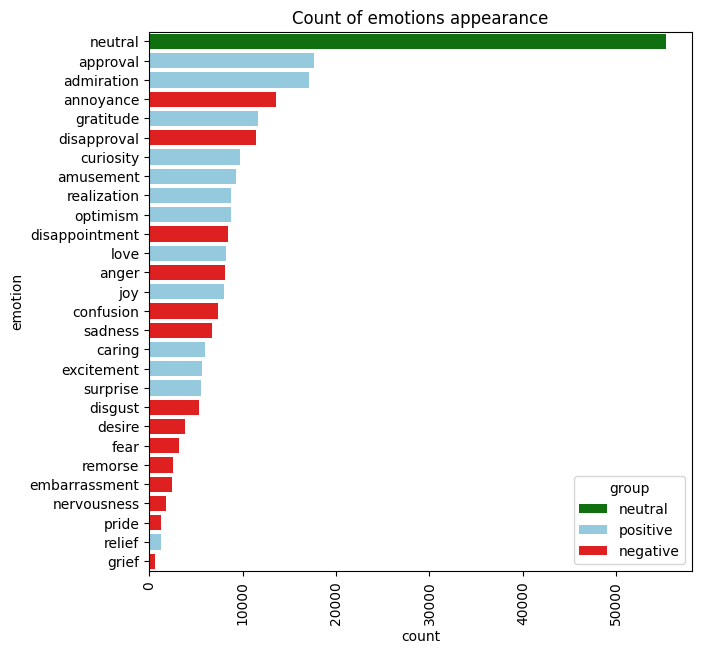

In [310]:
# Calculate the sum of each emotion's count
temp = sentiments_df[emotions].sum(axis=0) \
    .reset_index() \
    .rename(columns={'index': 'emotion', 0: 'count'}) \
    .merge(df_emotion, how='left', on='emotion') \
    .sort_values('count', ascending=False)

# Define colors for different emotion groups
palette = {
    "positive": "skyblue",
    "negative": "red",
    "neutral": "green"
}

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)

sns.barplot(data=temp, x='count', y='emotion', hue='group',
            dodge=False, palette=palette, ax=ax)

ax.set_title('Count of emotions appearance')
plt.show()

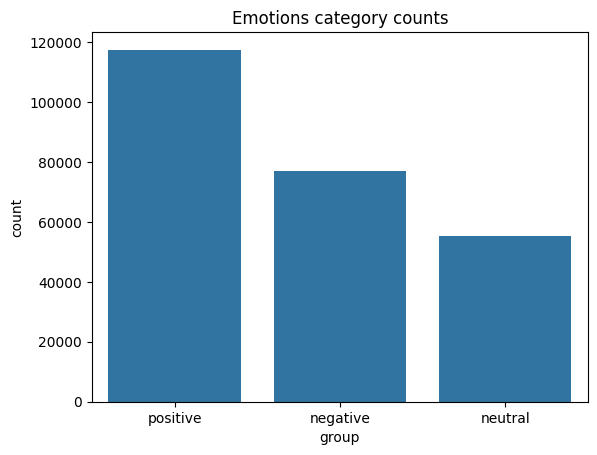

In [311]:
temp = temp.groupby('group').agg('sum').reset_index()
temp = temp.sort_values('count', ascending=False)

ax = sns.barplot(data=temp, x='group', y='count')
ax.set_title('Emotions category counts')
plt.show()

In [312]:
emotion_counts = {}
for c in positive_col:
    emotion_counts[c]  = positive_col[c].value_counts().to_dict()[1]

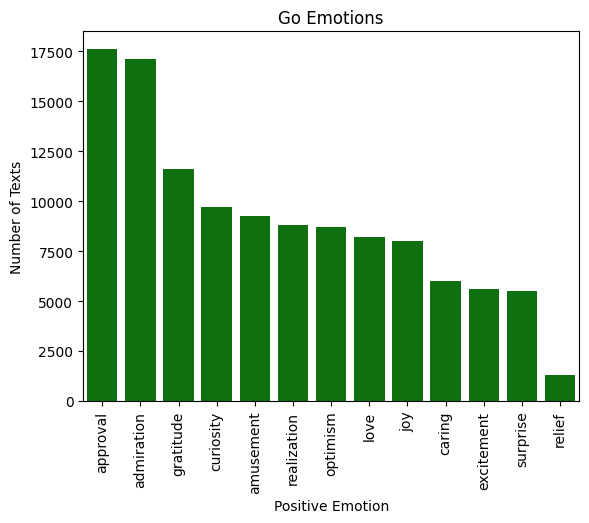

In [313]:
# Sort the emotion counts dictionary by values in descending order
emotion_counts_sorted = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)

# Extract emotions and counts as separate lists from the sorted dictionary
emotions = [item[0] for item in emotion_counts_sorted]
counts = [item[1] for item in emotion_counts_sorted]

# Create the bar plot using Seaborn
sns.barplot(x=emotions, y=counts, color='green')

# Set plot labels and title
plt.title('Go Emotions')
plt.xlabel("Positive Emotion")
plt.ylabel("Number of Texts")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [314]:
emotion_counts = {}
for c in negative_col:
    emotion_counts[c]  = negative_col[c].value_counts().to_dict()[1]

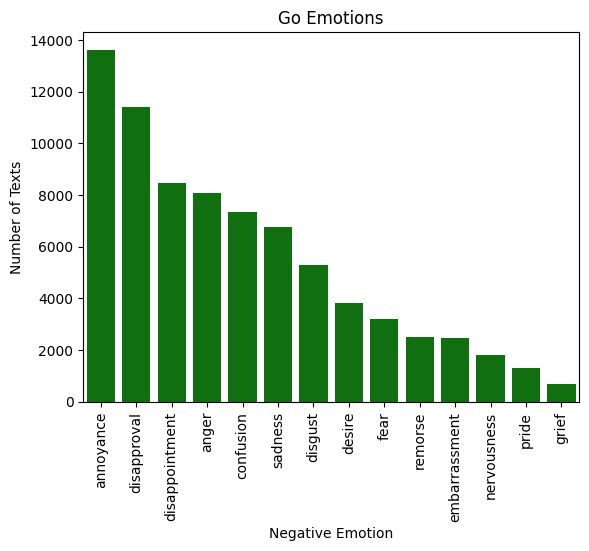

In [315]:
# Sort the emotion counts dictionary by values in descending order
emotion_counts_sorted = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)

# Extract emotions and counts as separate lists from the sorted dictionary
emotions = [item[0] for item in emotion_counts_sorted]
counts = [item[1] for item in emotion_counts_sorted]

# Create the bar plot using Seaborn with green color
sns.barplot(x=emotions, y=counts, color='green')

# Set plot labels and title
plt.title('Go Emotions')
plt.xlabel("Negative Emotion")
plt.ylabel("Number of Texts")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [316]:
neutral_counts = neutral_col.value_counts()
neutral_counts

neutral
0          152516
1           55298
Name: count, dtype: int64

In [317]:
sentiments_df.columns

Index(['original_text', 'text', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral', 'listed_emotions',
       'emotion_count', 'emojis', 'labels', 'encoded_labels'],
      dtype='object')

In [318]:
sentiments_df = sentiments_df[['original_text', 'text', 'listed_emotions','emotion_count','labels','encoded_labels']]
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207814 entries, eew5j0j to edrhoxh
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   original_text    207814 non-null  object
 1   text             207814 non-null  object
 2   listed_emotions  207814 non-null  object
 3   emotion_count    207814 non-null  int64 
 4   labels           207814 non-null  object
 5   encoded_labels   207814 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 18.4+ MB


In [319]:
# Filter the DataFrame to select rows where 'text' is not equal to 0
filtered_df = sentiments_df[sentiments_df['text'] != 0]

# Group by 'text', create lists of 'listed_emotions' and 'labels', and store them in 'emotions' and 'labels' columns
grouped_sentiments = filtered_df.groupby('text').apply(lambda x: pd.Series({
    #'emotions_': x['listed_emotions'].tolist(),
    #'labels': x['labels'].tolist()
})).reset_index()

# Explode the lists in 'emotions' and 'labels' columns to separate rows
grouped_sentiments = grouped_sentiments.explode('text')

# Print the resulting DataFrame
print(grouped_sentiments.head(20))

                                                                                                          text
0                                                                                                             
1                                                                                                             
2                                                                                                             
3                                                                                                             
4                                                                                                             
5                                                                                                             
6                                                                                                             
7                                                                                                             
8

In [356]:
# Handling missing values in the 'text' column
pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
grouped_sentiments = grouped_sentiments[grouped_sentiments['text'] != '']
grouped_sentiments.head(50)
# Reset the index of the DataFrame
grouped_sentiments.reset_index(drop=True, inplace=True)

In [321]:
duplicates = grouped_sentiments['text'].duplicated().sum()
duplicates

0

In [322]:
grouped_sentiments.shape


(57525, 1)

In [323]:
# Drop duplicates based on specific columns
no_duplicates = grouped_sentiments.drop_duplicates()
no_duplicates.shape

(57525, 1)

In [324]:
# Perform a left join to keep only the rows from 'no_duplicates' in the final DataFrame
final_df = no_duplicates.merge(sentiments_df, on=['text'], suffixes = ('_no_duplicates','_sentiments_df'))

# Print the resulting DataFrame
print(final_df)

                                                                                            text  \
0                                                                                                  
1                                                                                                  
2                                                                                                  
3                                                                                                  
4                                                                                                  
...                                                                                          ...   
207806  ♫ your love for me won t be quite the same when you take a whiff of my hershey stains  ♫   
207807                                              카니발 sounds more like cannibal than carnival    
207808                                              카니발 sounds more like cannibal than carnival    


In [325]:
final_df.shape


(207811, 6)

In [326]:
# Data with duplicates
#Deduping based on text column
sentiments_df = final_df.drop_duplicates(subset='text')
print("Deduplicated DataFrame based on 'Text':")
print(sentiments_df)
print()

Deduplicated DataFrame based on 'Text':
                                                                                            text  \
0                                                                                                  
18                                                                                                 
39                                                                                                 
84                                                                                                 
99                                                                                                 
...                                                                                          ...   
207796                                           “you”  netflix  thank me later  hang in there     
207799                                      “…dont try it      i have the  moral  high ground ”    
207803                      ‪still havent lost  in a row  st

In [327]:
sentiments_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 57525 entries, 0 to 207807
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             57525 non-null  object
 1   original_text    57525 non-null  object
 2   listed_emotions  57525 non-null  object
 3   emotion_count    57525 non-null  int64 
 4   labels           57525 non-null  object
 5   encoded_labels   57525 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 2.9+ MB


In [328]:
# saving the sentiments_df to a csv
sentiments_df.to_csv('Preprocessed_data_regex.csv', index = True)

In [329]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [330]:
# Load the dataframe
data_re = pd.read_csv('Preprocessed_data_regex.csv')

# Create a copy of the dataframe
pre_df = data_re.copy()

# Handling missing values in the 'text' column
pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
pre_df = pre_df[pre_df['text'] != '']

# Reset the index of the DataFrame
pre_df.reset_index(drop=True, inplace=True)

In [331]:
pre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57525 entries, 0 to 57524
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       57525 non-null  int64 
 1   text             57525 non-null  object
 2   original_text    57525 non-null  object
 3   listed_emotions  57525 non-null  object
 4   emotion_count    57525 non-null  int64 
 5   labels           57525 non-null  object
 6   encoded_labels   57525 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.1+ MB


In [332]:
# Tokenization
tokenizer = Tokenizer()
texts = pre_df['text']
tokenizer.fit_on_texts(texts)  # 'texts' represents the text data
num_words = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index
embedding_dim = 100
sequence_lengths = [len(tokens) for tokens in tokenizer.texts_to_sequences(texts)]
max_sequence_length = max(sequence_lengths)
num_classes = len(set(pre_df['labels']))

In [333]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [334]:
# Vectorization
vectorizer = TfidfVectorizer()
text_vectorized = vectorizer.fit_transform(pre_df['text'].values.astype('U'))
svd = TruncatedSVD(n_components=100)
text_vectorized_svd = svd.fit_transform(text_vectorized)
vectorized_df = pd.DataFrame(text_vectorized_svd)
pre_df_vectorized = pd.concat([pre_df, vectorized_df], axis=1)

In [335]:
# Split the data
X = text_vectorized_svd
y = pre_df['encoded_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [336]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [337]:
# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [339]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [350]:
# Define the model architecture
model = Sequential()

model.add(LSTM(
    units=64,  # Number of LSTM units
    return_sequences=False,  # Return sequences for stacking LSTMs
    kernel_regularizer=l2(0.01),  # L2 regularization with lambda=0.01
    dropout=0.5,  # Dropout for input connections
    #recurrent_dropout=0.2,  # Dropout for recurrent connections
    input_shape=(1, X_train.shape[2]
)))

model.add(Dense(units=num_classes, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

In [351]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [362]:
X_train


array([[[ 0.21829281, -0.1055769 ,  0.00825033, ...,  0.02184001,
          0.00146286,  0.00487468]],

       [[ 0.07172953, -0.04440046, -0.06002519, ...,  0.00843488,
          0.00886473,  0.00857915]],

       [[ 0.11641346, -0.08387453,  0.06710417, ..., -0.01281923,
          0.014125  , -0.00109079]],

       ...,

       [[ 0.16555814, -0.05351165, -0.06941793, ...,  0.04491183,
          0.05039144,  0.01402351]],

       [[ 0.08641857,  0.00123503, -0.02480559, ..., -0.03128214,
          0.010089  , -0.01666646]],

       [[ 0.14481679,  0.20714021,  0.00663151, ...,  0.01099528,
          0.00485359, -0.01251741]]])

In [352]:
# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True,monitor='val_loss')
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded),
          callbacks=[early_stopping])

Epoch 1/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4413 - loss: 1.2978 - val_accuracy: 0.4462 - val_loss: 1.0714
Epoch 2/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4455 - loss: 1.0719 - val_accuracy: 0.4462 - val_loss: 1.0713
Epoch 3/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4470 - loss: 1.0711 - val_accuracy: 0.4462 - val_loss: 1.0712
Epoch 4/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4490 - loss: 1.0699 - val_accuracy: 0.4462 - val_loss: 1.0713
Epoch 5/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4490 - loss: 1.0700 - val_accuracy: 0.4462 - val_loss: 1.0713
Epoch 6/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4528 - loss: 1.0680 - val_accuracy: 0.4462 - val_loss: 1.0712
Epoch 7/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4445 - loss: 1.0721 - val_accuracy: 0.4462 - val_loss: 1.0712
Epoch 8/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4506 - loss: 1.0692 - 

In [ ]:
y_pred = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step
              precision    recall  f1-score   support

           0       0.52      0.27      0.36      6459
           1       0.42      0.16      0.23      6285
           2       0.51      0.86      0.64     10266

    accuracy                           0.50     23010
   macro avg       0.48      0.43      0.41     23010
weighted avg       0.49      0.50      0.45     23010



## finetuning the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture with improvements
model = Sequential()
model.add(Bidirectional(LSTM(units=64, dropout=0.5, recurrent_dropout=0.2), input_shape=(1, X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with adjusted learning rate and optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train_encoded, epochs=40, batch_size=32, validation_data=(X_test, y_test_encoded),
          callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)
print(classification_report(y_test_labels, y_pred_labels))

Epoch 1/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4538 - loss: 1.0436 - val_accuracy: 0.4938 - val_loss: 0.9851
Epoch 2/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4758 - loss: 1.0115 - val_accuracy: 0.4945 - val_loss: 0.9823
Epoch 3/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4781 - loss: 1.0088 - val_accuracy: 0.5021 - val_loss: 0.9824
Epoch 4/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4835 - loss: 1.0017 - val_accuracy: 0.4897 - val_loss: 0.9805
Epoch 5/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4743 - loss: 1.0065 - val_accuracy: 0.4957 - val_loss: 0.9781
Epoch 6/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4808 - loss: 1.0007 - val_accuracy: 0.5020 - val_loss: 0.9815
Epoch 7/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4809 - loss: 1.0006 - val_accuracy: 0.4970 - val_loss: 0.9779
Epoch 8/40
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4750 - loss: 1.0071 -

In [359]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model architecture with improvements
model = Sequential()

# Bidirectional LSTM with Batch Normalization and Recurrent Dropout
model.add(Bidirectional(LSTM(units=64, 
                            kernel_regularizer=l2(0.01),  # L2 regularization with lambda=0.01
                            dropout=0.3, 
                            recurrent_dropout=0.3, 
                            return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second LSTM layer (optional for deeper architecture)
model.add(Bidirectional(LSTM(units=32, 
                              dropout=0.3, 
                              recurrent_dropout=0.3, 
                              return_sequences=False)))
model.add(BatchNormalization())

# Fully connected layer with Dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with adjusted learning rate and optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded, 
    epochs=40, 
    batch_size=64,  # Larger batch size can stabilize training
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels, y_pred_labels))


Epoch 1/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4139 - loss: 2.2039 - val_accuracy: 0.4752 - val_loss: 1.2025 - learning_rate: 0.0010
Epoch 2/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4777 - loss: 1.1104 - val_accuracy: 0.5038 - val_loss: 1.0238 - learning_rate: 0.0010
Epoch 3/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4831 - loss: 1.0322 - val_accuracy: 0.5025 - val_loss: 1.0097 - learning_rate: 0.0010
Epoch 4/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4838 - loss: 1.0269 - val_accuracy: 0.5021 - val_loss: 1.0092 - learning_rate: 0.0010
Epoch 5/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4861 - loss: 1.0265 - val_accuracy: 0.4923 - val_loss: 0.9993 - learning_rate: 0.0010
Epoch 6/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4722 - loss: 1.0302 - val_accuracy: 0.4963 - val_loss: 1.0027 - learning_rate: 0.0010
Epoch 7/40
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4856 - loss: 1.0179 

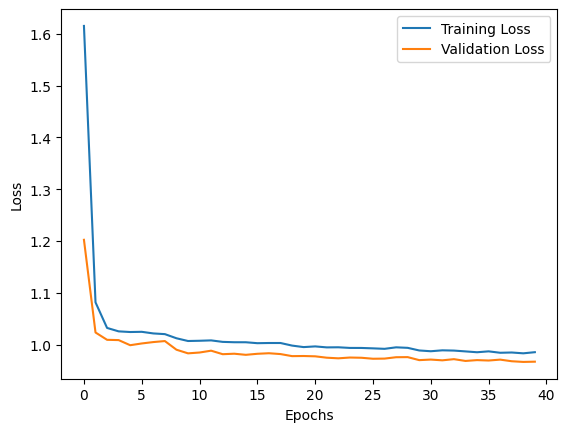

In [363]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [361]:
model.save('lstm_model_with_regularization.h5')

In [3]:
import pandas as pd
val_df = pd.read_csv('dev.tsv', sep='\t', header=None, names=['text', 'emotion_ids', 'comment_id'])


In [4]:
val_df

,text,emotion_ids,comment_id
0,Is this in New Orleans?? I really feel like th...,27,edgurhb
1,"You know the answer man, you are programmed to...","4,27",ee84bjg
2,I've never been this sad in my life!,25,edcu99z
3,The economy is heavily controlled and subsidiz...,"4,27",edc32e2
4,He could have easily taken a real camera from ...,20,eepig6r
...,...,...,...
5421,It's pretty dangerous when the state decides w...,14,edyrazk
5422,I filed for divorce this morning. Hoping he mo...,20,edi2z3y
5423,"The last time it happened I just said, ""No"" an...",10,eewbqtx
5424,I can’t stand this arrogant prick he’s no bett...,3,eefx57m
